In [1]:
import pandas as pd
import numpy as np

print("Kernel working")

Kernel working


In [2]:
import pandas as pd

# Column names for German Credit dataset (UCI version)
columns = [
    "status", "duration", "credit_history", "purpose", "credit_amount",
    "savings", "employment_duration", "installment_rate", "personal_status_sex",
    "other_debtors", "present_residence", "property", "age",
    "other_installment_plans", "housing", "existing_credits",
    "job", "dependents", "telephone", "foreign_worker", "target"
]

df = pd.read_csv(
    "../Data/german.data",
    sep=" ",
    header=None,
    names=columns
)

df.head()

,status,duration,credit_history,purpose,credit_amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
df.shape

(1000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [5]:
df.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [6]:
df["default"] = df["target"].apply(lambda x: 1 if x == 2 else 0)

df["default"].value_counts()

default
0    700
1    300
Name: count, dtype: int64

In [7]:
df["default"].mean()

np.float64(0.3)

## 2. Target Definition
**Default Rate:** 30%

The dataset contains a relatively high proportion of default cases,
indicating a risk-heavy borrower population. This imbalance will be
considered during model development.

In [14]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
target                     0
default                    0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
credit_amount               int64
savings                    object
employment_duration        object
installment_rate            int64
personal_status_sex        object
other_debtors              object
present_residence           int64
property                   object
age                         int64
other_installment_plans    object
housing                    object
existing_credits            int64
job                        object
dependents                  int64
telephone                  object
foreign_worker             object
target                      int64
default                     int64
dtype: object

**Data Quality Assessment**

- No missing values detected across all variables
- No duplicate records found
- Dataset appears clean and ready for analysis

Note: Many features are categorical codes and will require encoding
during the modeling phase.

Matplotlib is building the font cache; this may take a moment.


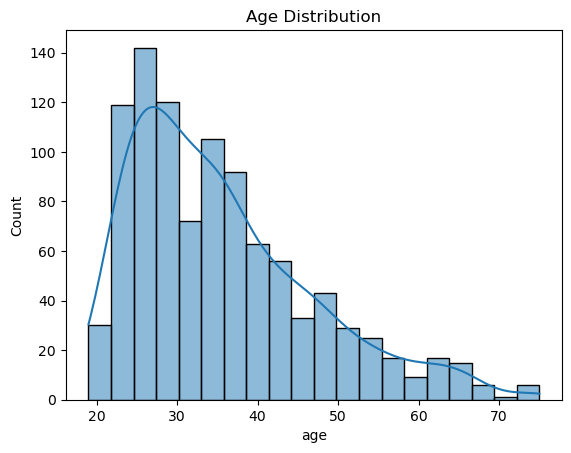

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

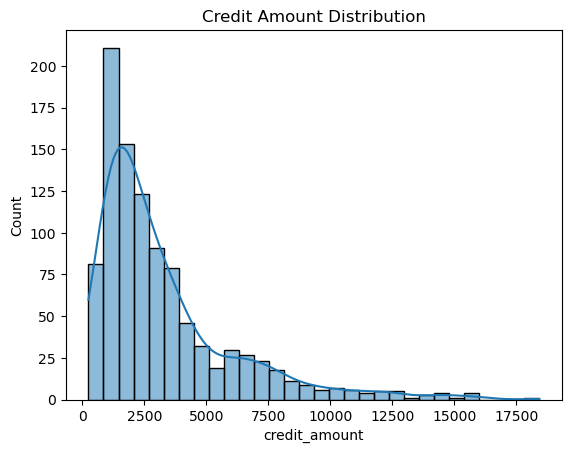

In [19]:
sns.histplot(df["credit_amount"], bins=30, kde=True)
plt.title("Credit Amount Distribution")
plt.show()

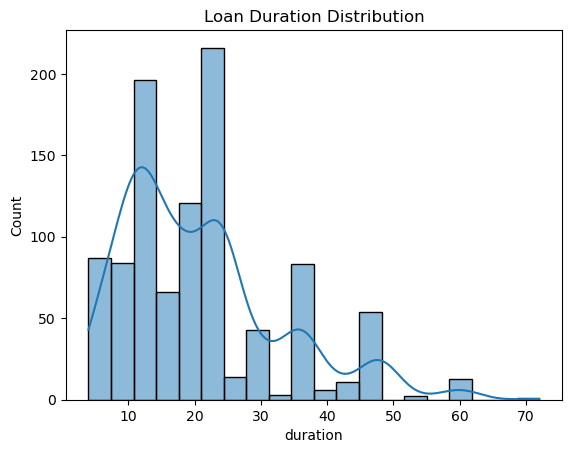

In [20]:
sns.histplot(df["duration"], bins=20, kde=True)
plt.title("Loan Duration Distribution")
plt.show()

## 4. Univariate Analysis
**Key Observations**

- Borrowers are predominantly young to middle-aged
- Loan amounts are moderate, suggesting consumer financing
- Loan durations are relatively short (mostly under 4 years)

Overall, the dataset reflects a retail credit portfolio rather than large corporate lending.

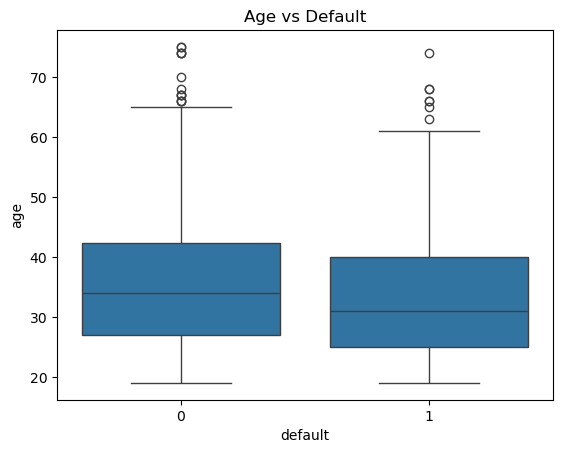

In [21]:
sns.boxplot(x="default", y="age", data=df)
plt.title("Age vs Default")
plt.show()

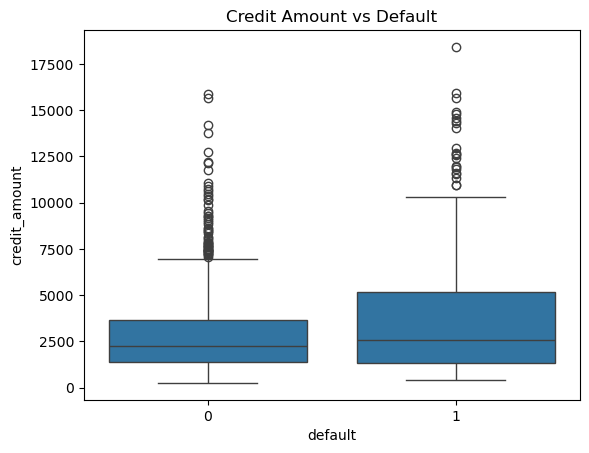

In [22]:
sns.boxplot(x="default", y="credit_amount", data=df)
plt.title("Credit Amount vs Default")
plt.show()

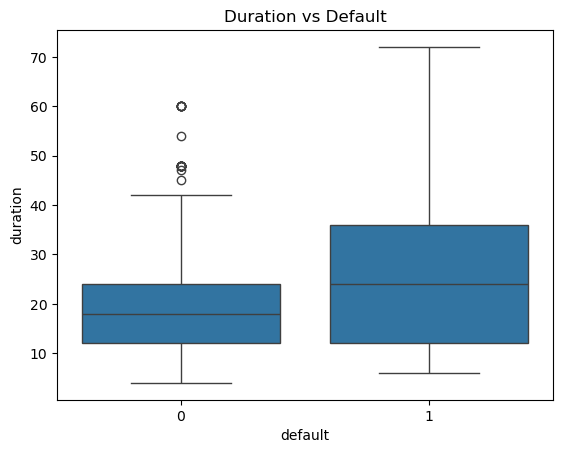

In [23]:
sns.boxplot(x="default", y="duration", data=df)
plt.title("Duration vs Default")
plt.show()

## 5. Bivariate Analysis vs Target
**Key Risk Relationships**

- Defaulters tend to take larger loan amounts, indicating higher financial burden
- Longer loan durations are associated with higher default rates due to increased uncertainty over time
- Younger borrowers show slightly elevated risk compared to older borrowers

Loan amount and duration appear to be the strongest predictors of default risk in this dataset.

In [24]:
pd.crosstab(df["credit_history"], df["default"], normalize="index")

default,0,1
credit_history,,
A30,0.375000,0.625000
A31,0.428571,0.571429
A32,0.681132,0.318868
A33,0.681818,0.318182
A34,0.829352,0.170648


In [25]:
pd.crosstab(df["savings"], df["default"], normalize="index")

default,0,1
savings,,
A61,0.640133,0.359867
A62,0.669903,0.330097
A63,0.825397,0.174603
A64,0.875000,0.125000
A65,0.825137,0.174863


In [26]:
pd.crosstab(df["employment_duration"], df["default"], normalize="index")

default,0,1
employment_duration,,
A71,0.629032,0.370968
A72,0.593023,0.406977
A73,0.693215,0.306785
A74,0.775862,0.224138
A75,0.747036,0.252964


## 6. Key Risk Insights
**High-Risk Borrower Characteristics**

Analysis of categorical variables reveals that the highest default risk is associated with:

- Credit history A30/A31 (thin or unclear credit history)
- Savings A61 (very low savings)
- Employment duration A72 (< 1 year)

These factors indicate financially fragile borrowers with limited stability and repayment capacity.

Conversely, borrowers with strong credit history, higher savings, and long employment tenure exhibit substantially lower default risk.

## 7. Phase 1 Summary
**Dataset Risk Profile**

- Default rate is 30%, indicating a high-risk borrower population
- Larger loan amounts and longer durations are strongly associated with default
- Younger borrowers exhibit slightly elevated risk
- Thin credit history significantly increases default likelihood
- Low savings levels correlate with higher risk
- Short employment tenure is a major vulnerability factor

Overall, the dataset represents a retail consumer credit portfolio where financial stability indicators strongly influence repayment behavior.

In [27]:
X = df.drop(columns=["target", "default"])
y = df["default"]

X.shape, y.shape

((1000, 20), (1000,))

In [28]:
X.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
credit_amount               int64
savings                    object
employment_duration        object
installment_rate            int64
personal_status_sex        object
other_debtors              object
present_residence           int64
property                   object
age                         int64
other_installment_plans    object
housing                    object
existing_credits            int64
job                        object
dependents                  int64
telephone                  object
foreign_worker             object
dtype: object

In [29]:
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.shape

(1000, 48)

In [30]:
X_encoded.dtypes.value_counts()

bool     41
int64     7
Name: count, dtype: int64

## Phase 2: Feature Engineering
Categorical variables were transformed using one-hot encoding to create
a fully numeric feature matrix suitable for machine learning models.
The first category of each variable was dropped to prevent similar predictors.

In [31]:
numeric_cols = X_encoded.select_dtypes(include=["int64"]).columns

numeric_cols

Index(['duration', 'credit_amount', 'installment_rate', 'present_residence',
       'age', 'existing_credits', 'dependents'],
      dtype='object')

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

Numeric variables were standardized to ensure comparable scales
across features and improve model stability.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((800, 48), (200, 48))

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced", max_iter=1000)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [35]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.745

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[102,  38],
       [ 13,  47]])

## Phase 3: Baseline Model
A logistic regression model was trained to estimate probability of default (PD).
Class imbalance was addressed using balanced class weights.

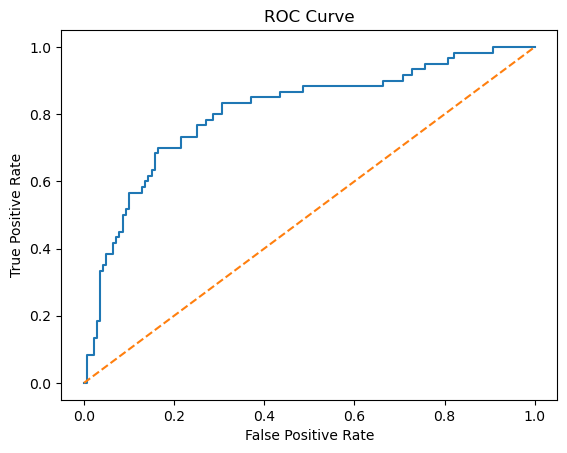

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [39]:
roc_auc_score(y_test, y_prob)

0.8073809523809524

In [40]:
import numpy as np

# Separate probabilities by actual class
prob_default = y_prob[y_test == 1]
prob_nondefault = y_prob[y_test == 0]

# Sort
prob_default_sorted = np.sort(prob_default)
prob_nondefault_sorted = np.sort(prob_nondefault)

# Empirical CDFs
cdf_default = np.arange(1, len(prob_default_sorted)+1) / len(prob_default_sorted)
cdf_nondefault = np.arange(1, len(prob_nondefault_sorted)+1) / len(prob_nondefault_sorted)

# KS = max difference between CDFs
ks_stat = np.max(np.abs(cdf_default[:min(len(cdf_default), len(cdf_nondefault))] -
                        cdf_nondefault[:min(len(cdf_default), len(cdf_nondefault))]))

ks_stat

np.float64(0.5714285714285714)

## Phase 4: Model Evaluation
Model performance was evaluated using ROC-AUC and KS statistics,
which assess the model's ability to discriminate between defaulting
and non-defaulting borrowers across thresholds.

In [41]:
threshold = 0.5

y_pred_05 = (y_prob >= threshold).astype(int)

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_05)

array([[102,  38],
       [ 13,  47]])

In [43]:
import numpy as np

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    
    print(f"\nThreshold: {t}")
    print(f"False Positives (reject good): {fp}")
    print(f"False Negatives (approve bad): {fn}")


Threshold: 0.2
False Positives (reject good): 94
False Negatives (approve bad): 6

Threshold: 0.3
False Positives (reject good): 71
False Negatives (approve bad): 7

Threshold: 0.4
False Positives (reject good): 55
False Negatives (approve bad): 9

Threshold: 0.5
False Positives (reject good): 38
False Negatives (approve bad): 13

Threshold: 0.6
False Positives (reject good): 29
False Negatives (approve bad): 18


In [44]:
import pandas as pd

results = []

for t in np.arange(0.1, 0.9, 0.1):
    y_pred_t = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    
    results.append([t, fp, fn])

decision_table = pd.DataFrame(
    results,
    columns=["Threshold", "False_Positive", "False_Negative"]
)

decision_table

,Threshold,False_Positive,False_Negative
0,0.1,119,1
1,0.2,94,6
2,0.3,71,7
3,0.4,55,9
4,0.5,38,13
5,0.6,29,18
6,0.7,14,28
7,0.8,7,39


In [45]:
df_test = X_test.copy()
df_test["PD"] = y_prob

bins = [0, 0.2, 0.4, 0.6, 1.0]
labels = ["Low", "Moderate", "High", "Very High"]

df_test["Risk_Band"] = pd.cut(df_test["PD"], bins=bins, labels=labels)

df_test["Risk_Band"].value_counts()

Risk_Band
Very High    71
Low          52
Moderate     42
High         35
Name: count, dtype: int64

## Phase 5: Decision Threshold & Policy
Model probabilities were converted into actionable lending decisions
using threshold analysis and risk segmentation. Different thresholds
reflect varying risk tolerance levels and business trade-offs between
missed defaults and lost approvals.

**Threshold Analysis**

A threshold of 0.5 provides a balanced trade-off between rejecting safe
borrowers and approving risky ones. Lower thresholds reduce credit losses
but significantly limit approvals, while higher thresholds increase exposure
to default risk.

Risk segmentation shows a meaningful distribution across risk bands,
enabling differentiated lending strategies rather than binary decisions.

In [46]:
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]
})

coefficients.sort_values(by="Coefficient", ascending=False).head(10)

,Feature,Coefficient
38,property_A124,0.870274
20,purpose_A46,0.586116
1,credit_amount,0.385453
34,other_debtors_A102,0.366586
2,installment_rate,0.355444
0,duration,0.313078
44,job_A173,0.232436
37,property_A123,0.229838
43,job_A172,0.226669
19,purpose_A45,0.223747


In [47]:
coefficients.sort_values(by="Coefficient").head(10)

,Feature,Coefficient
9,status_A14,-1.563333
14,purpose_A41,-1.249241
13,credit_history_A34,-1.173062
25,savings_A64,-1.159623
47,foreign_worker_A202,-1.016265
26,savings_A65,-0.868232
40,other_installment_plans_A143,-0.827264
15,purpose_A410,-0.815449
32,personal_status_sex_A93,-0.787246
42,housing_A153,-0.778927


<Axes: title={'center': 'Top Risk Drivers'}, ylabel='Feature'>

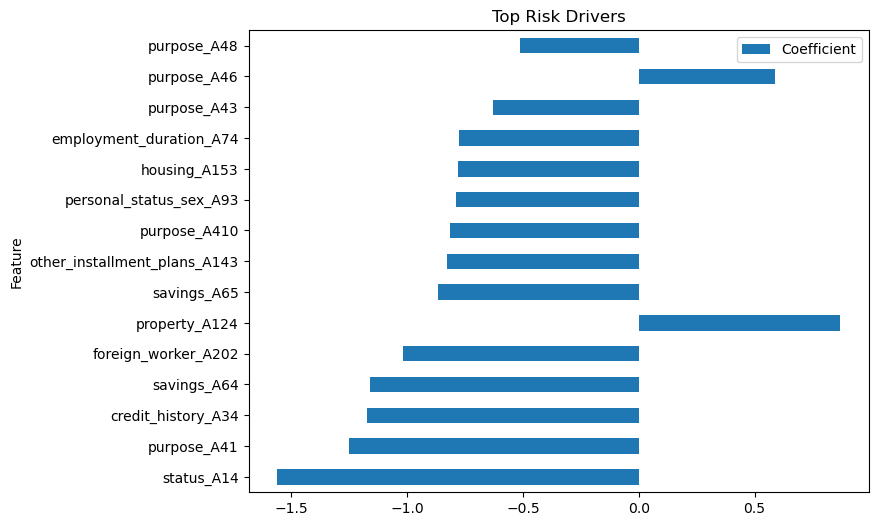

In [48]:
top_features = coefficients.reindex(
    coefficients.Coefficient.abs().sort_values(ascending=False).index
).head(15)

top_features.plot(
    x="Feature",
    y="Coefficient",
    kind="barh",
    figsize=(8,6),
    title="Top Risk Drivers"
)

In [50]:
sample_df = X_test.iloc[[0]]          # NOTE the double brackets -> DataFrame
sample_prob = model.predict_proba(sample_df)[0, 1]
sample_prob

np.float64(0.44670090211999874)

In [51]:
pd_value = float(sample_prob)

if pd_value < 0.2:
    band = "Low"
elif pd_value < 0.4:
    band = "Moderate"
elif pd_value < 0.6:
    band = "High"
else:
    band = "Very High"

pd_value, band

(0.44670090211999874, 'High')

## Phase 6: Model Interpretation — Risk Drivers Analysis

To ensure transparency and business usability, the logistic regression
model was analyzed to identify key drivers of default risk.

Model coefficients provide direct interpretability:

- Positive coefficients indicate factors associated with higher probability of default.
- Negative coefficients indicate protective factors associated with lower risk.

### Key Risk-Increasing Factors

The strongest contributors to elevated default risk include:

- High loan amount and longer repayment duration
- Higher installment burden relative to income
- Certain loan purposes historically associated with higher default rates
- Property and employment characteristics indicating weaker financial stability
- Presence of additional debt obligations

These variables increase repayment stress and uncertainty, raising the likelihood of default.

### Key Protective Factors

Several factors significantly reduce predicted default risk:

- Strong account status with the bank
- Positive credit history
- Higher levels of savings, indicating financial resilience
- Stable housing conditions
- Certain loan purposes associated with productive use of funds

These characteristics signal borrower stability and repayment capacity.

### Interpretation of Individual Predictions

The model produces borrower-level probability of default (PD), allowing
risk assessment at the individual level. Risk drivers can be examined
to understand why a specific borrower is classified as low, moderate,
or high risk.

### Business Importance

Interpretability is critical in credit risk modeling because decisions
must be explainable to:

- Internal risk committees
- Regulators and auditors
- Business stakeholders
- Customers in dispute scenarios

This transparency makes logistic regression a preferred model for
production credit scoring systems.

In [52]:
import numpy as np

# Avoid division issues for extreme probabilities
eps = 1e-6
pd_safe = np.clip(y_prob, eps, 1 - eps)

# Score transformation parameters
A = 600   # base score
B = 50    # scaling factor

scores = A - B * np.log(pd_safe / (1 - pd_safe))

scores[:10]

array([610.70047358, 677.06968431, 535.74947865, 568.95358746,
       636.47921672, 658.79483334, 621.17738936, 666.73726546,
       569.92295085, 645.45871083])

In [53]:
df_scores = X_test.copy()
df_scores["PD"] = y_prob
df_scores["Score"] = scores

df_scores[["PD", "Score"]].head()

,PD,Score
30,0.446701,610.700474
128,0.176333,677.069684
289,0.783301,535.749479
216,0.650430,568.953587
966,0.325286,636.479217


In [54]:
bins = [0, 500, 600, 700, 850]
labels = ["Poor", "Fair", "Good", "Excellent"]

df_scores["Score_Band"] = pd.cut(
    df_scores["Score"],
    bins=bins,
    labels=labels
)

df_scores["Score_Band"].value_counts()

Score_Band
Good         89
Fair         72
Excellent    26
Poor         13
Name: count, dtype: int64

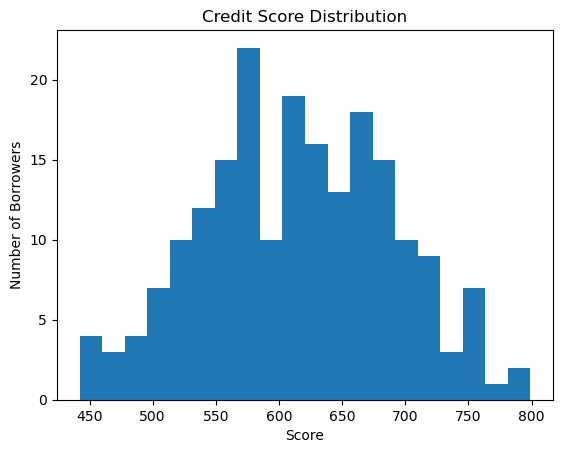

In [55]:
import matplotlib.pyplot as plt

plt.hist(df_scores["Score"], bins=20)
plt.title("Credit Score Distribution")
plt.xlabel("Score")
plt.ylabel("Number of Borrowers")
plt.show()

## Phase 7: Credit Scorecard Transformation

Model-predicted probabilities of default (PD) were transformed into a
credit score using a log-odds scaling approach. This produces an intuitive
risk measure where higher scores correspond to lower default risk.

Score bands were defined to categorize borrowers into Poor, Fair, Good,
and Excellent segments, enabling policy-based lending decisions and
portfolio analysis.

Scorecards are widely used in retail lending due to their interpretability,
consistency, and ease of communication to stakeholders.

In [57]:
import os

os.makedirs("Outputs", exist_ok=True)

In [58]:
df_scores.to_csv("Outputs/credit_scores.csv", index=False)

In [59]:
import os

os.makedirs("Outputs", exist_ok=True)

df_scores.to_csv("Outputs/credit_scores.csv", index=False)

In [60]:
import os
os.listdir("Outputs")

['credit_scores.csv']

## Final Project Summary — Credit Risk PD Model

This project developed an end-to-end Probability of Default (PD) modeling
framework using the German Credit dataset to simulate real-world credit
risk analytics in retail banking.

### Key Components Completed

- Data cleaning and preprocessing of borrower attributes
- Exploratory data analysis to identify risk patterns
- Feature engineering and encoding of categorical variables
- Logistic regression model development
- Performance evaluation using ROC-AUC and KS statistics
- Threshold analysis to simulate lending policies
- Risk band segmentation for decision support
- Credit score transformation using log-odds scaling
- Interpretation of model drivers for explainability
- Export of scored dataset for downstream use

### Model Performance

The model demonstrates strong discriminatory power, effectively
distinguishing between defaulting and non-defaulting borrowers and
producing interpretable outputs suitable for business decision-making.

### Business Relevance

This workflow mirrors key components of production credit risk
modeling pipelines used by banks and financial institutions for:

- Loan approval decisions
- Risk-based pricing
- Portfolio monitoring
- Regulatory compliance
- Capital allocation

### Conclusion

The project showcases a complete credit risk analytics pipeline,
from raw data to actionable lending decisions, highlighting both
technical modeling skills and business-oriented interpretation.